In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'statsmodels'

In [60]:
from sklearn import metrics
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

In [3]:
df=sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
df.affairs = (df.affairs>0).astype(int)
df.affairs.unique()

array([1, 0])

In [5]:
y,X=dmatrices('affairs~rate_marriage + age + yrs_married + children + religious + educ + C(occupation_husb)', df, return_type="dataframe")
X.head()

,Intercept,C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [12]:
X = X.rename(columns ={'C(occupation)[1.0]':'occ_1','C(occupation)[2.0]':'occ_2','C(occupation)[3.0]' : 'occ_3' ,'C(occupation[4.0]' : 'occ_4','C(occupation[5.0]':'occ_5','C(occupation)[6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2', 'C(occupation_husb[T.3.0]' :'occ_husb_3','C(occupation_husb)[T.4.0]':'occ_husb_4' , 'C(occupation_husb)[T.5.0]':'occ_husb_5', 'C(occupation_husb)[T.6.0]':'occ_husb_6'})
X.head()

,Intercept,occ_husb_2,C(occupation_husb)[T.3.0],occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [13]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3', 'C(occupation)[T.4.0]':'occ_4', 'C(occupation)[T.5.0]':'occ_5', 'C(occupation)[T.6.0]':'occ_6', 'C(occupation_husb)[T.2.0]':'occ_husb_2', 'C(occupation_husb)[T.3.0]':'occ_husb_3', 'C(occupation_husb)[T.4.0]':'occ_husb_4', 'C(occupation_husb)[T.5.0]':'occ_husb_5', 'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [14]:
X.head()

,Intercept,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [16]:
df=pd.concat([X,y],axis=1)

In [17]:
df.isnull().sum()

Intercept        0
occ_husb_2       0
occ_husb_3       0
occ_husb_4       0
occ_husb_5       0
occ_husb_6       0
rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
affairs          0
dtype: int64

In [18]:
df.affairs.value_counts()

0.0    4313
1.0    2053
Name: affairs, dtype: int64

In [19]:
print(df[df["affairs"]==0].shape)
print(df[df["affairs"]==1].shape)

(4313, 13)
(2053, 13)


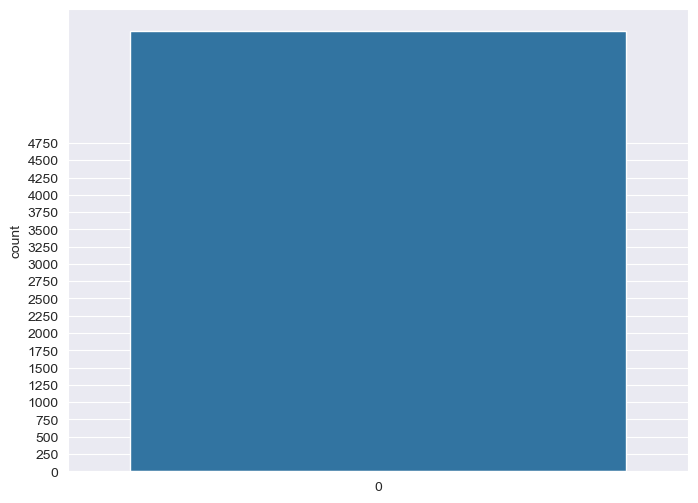

In [22]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(np.ravel(y))
plt.yticks(range(0,5000,250))
plt.show()

In [23]:
rdm=RandomOverSampler()
X,y=rdm.fit_resample(X,y)
df=pd.concat([X,y],axis=1)
print(df[df["affairs"]==0].shape)
print(df[df["affairs"]==1].shape)

(4313, 13)
(4313, 13)


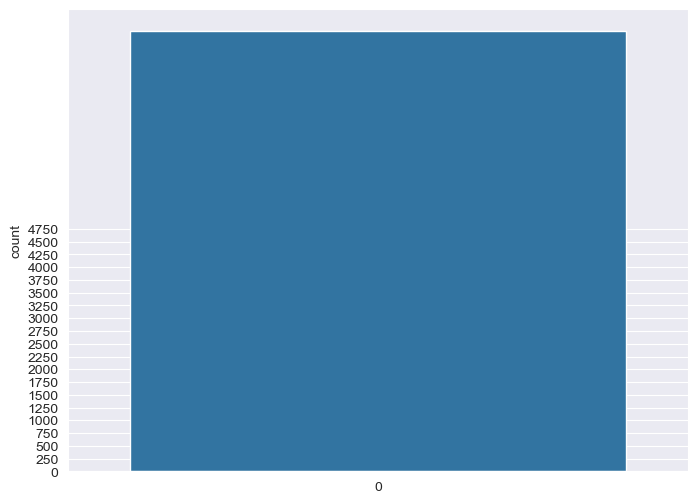

In [27]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot(np.ravel(y))
plt.yticks(range(0,5000,250))
plt.show()

In [28]:
df.describe()

,Intercept,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affairs
count,8626.0,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000,8626.000000
mean,1.0,0.203339,0.081382,0.317876,0.281011,0.082541,3.990146,29.442847,9.548342,1.484234,2.388709,14.167749,0.500000
std,0.0,0.402506,0.273437,0.465678,0.449519,0.275203,1.002615,6.848656,7.329119,1.437423,0.868626,2.180500,0.500029
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,22.000000,2.500000,0.000000,2.000000,12.000000,0.000000
50%,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,0.500000
75%,1.0,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,1.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,1.000000


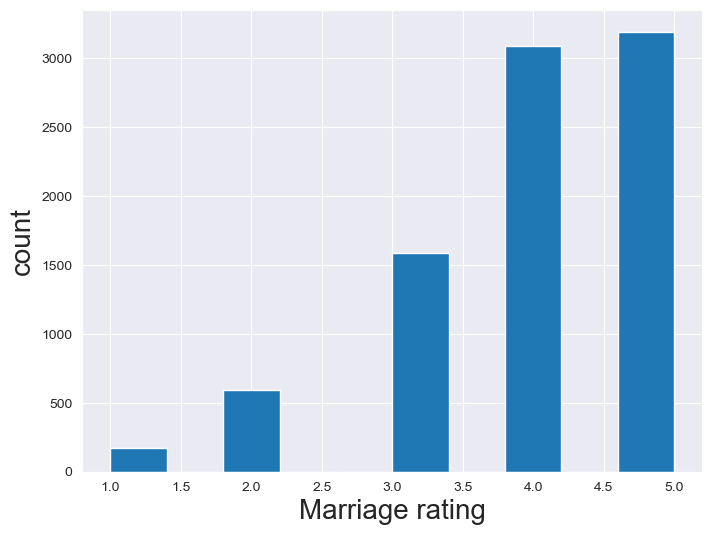

In [29]:
plt.figure(figsize=(8,6))
plt.hist(df["rate_marriage"])
plt.xlabel("Marriage rating",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

In [35]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("educ",hue="affairs",data=df,order=df["educ"].value_counts().index)
plt.xlabel("education",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

TypeError: 'str' object is not callable

<Figure size 800x600 with 0 Axes>

In [39]:
plt.figure(figsize=(8,6))
sns.set_style("darkgrid")
sns.countplot("religious",hue="affairs",data=df)
plt.xlabel("religious",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

TypeError: 'str' object is not callable

<Figure size 800x600 with 0 Axes>

In [41]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6900, 12)
(6900, 1)
(1726, 12)
(1726, 1)


In [62]:
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_predicted=clf.predict(x_test)
y_train_predicted=clf.predict(x_train)

C:\Users\Sukrit Goswami\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Sukrit Goswami\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
accuracy = accuracy_score(y_test,y_predicted)
print("train set accuracy score: ",accuracy_score(y_train,y_train_predicted))
print("test set accuracy score :",  accuracy_score(y_test,y_predicted))

train set accuracy score:  0.6794202898550724
test set accuracy score : 0.6853997682502897


In [47]:
cm = confusion_matrix(y_test,y_predicted, labels=clf.classes_)
cm

array([[631, 262],
       [281, 552]], dtype=int64)

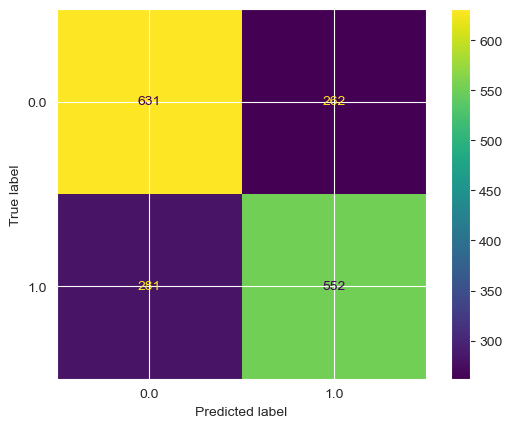

In [48]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [65]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

         0.0       0.69      0.71      0.70       893
         1.0       0.68      0.66      0.67       833

    accuracy                           0.69      1726
   macro avg       0.69      0.68      0.68      1726
weighted avg       0.69      0.69      0.69      1726



In [67]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicted)

NameError: name 'roc_curve' is not defined

In [68]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

NameError: name 'fpr' is not defined

In [57]:
print("Prediction chance of your model :")
print(clf.predict_proba(np.array([[0,0,0,0,0,1,1,0,0,0,0,4]]))*100)

Prediction chance of your model :
[[12.9912335 87.0087665]]


C:\Users\Sukrit Goswami\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [58]:
print("your prediction is  :",clf.predict(np.array([[0,0,0,0,0,1,1,0,0,0,0,4]])))

your prediction is  : [1.]


C:\Users\Sukrit Goswami\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
